<a href="https://colab.research.google.com/github/neethu-vm/ML-project/blob/main/NFLData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neethu VM
8/07/2021

# Install all necessary libraries

In [2]:
!python3 -m pip install -U pip
!python3 -m pip install -U setuptools wheel
!python3 -m pip install -U "mxnet<2.0.0"
!python3 -m pip install autogluon 

     |████████████████████████████████| 1.6MB 7.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 818 kB 7.0 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 46.9 MB 43 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 250 kB 7.7 MB/s 
     |████████████████████████████████| 334 kB 42.8 MB/s 
  

#import autogluon and tablularpredictor

In [3]:
import autogluon.core as ag
from autogluon.tabular import TabularPredictor as task

In [4]:
import pandas as pd
import numpy as np

#mount to drive to access dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
PATH = "/content/drive/MyDrive/Colab Notebooks/nfldata6.csv"

In [7]:

data = pd.read_csv(PATH)

data.head()

,_c0,Date(IST),NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
0,1,2020-01-02,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
1,2,2020-01-03,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.20,879.0,973.0,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
2,3,2020-01-06,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.70,360.0,1502.0,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
3,4,2020-01-07,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
4,5,2020-01-08,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.40,725.0,1109.0,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


# Data cleaning

In [8]:
data = data.drop(['_c0','Date(IST)'],axis=1)

In [9]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [10]:
train_df.head()

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
0,12115.673242,12177.119957,12151.571552,12216.272367,2670.78,1982.02,688.76,3490.16,3426.21,63.95,1356.0,482.0,-0.01,0.397,-0.98,0.72,-0.0520,0.0399,-0.10,-1.309999
1,12195.406448,12275.487382,12173.355954,12251.196928,4514.35,3251.30,1263.05,2750.87,3780.07,-1029.20,879.0,973.0,-0.23,-0.510,-1.33,0.46,0.4430,0.5648,0.08,1.550000
2,12272.929018,12299.127043,12181.887534,12228.903255,3732.00,3835.84,-103.84,3778.78,3802.48,-23.70,360.0,1502.0,-0.17,0.015,-0.21,-0.07,0.0877,-0.0690,-0.18,-0.170000
3,12237.309351,12242.227141,12030.371144,12051.960005,3911.17,4593.40,-682.23,4205.16,3893.97,311.19,1248.0,578.0,-0.21,-0.050,-0.02,-1.79,-0.0437,-0.0208,0.08,-0.060000
4,12149.137851,12192.474725,11985.555622,12017.343536,4109.04,4624.89,-515.85,5162.02,4413.62,748.40,725.0,1109.0,0.56,0.305,0.54,-0.59,-0.2980,-0.6992,-0.65,-0.340000


In [11]:
test_df.head()

,NFO,NFH,NFL,NFC,FIIB,FIIS,FIIN,DIIB,DIIS,DIIN,August,December,CAD,DAD,DOD,NDAD,Currey,Flow,Shine,Vega
250,14682.481531,14714.912106,14480.442931,14573.937584,6715.91,6458.36,257.55,5146.41,5345.71,-199.30,1431.0,517.0,-0.10,0.3965,0.24,2.22,-0.0010,0.2139,0.25,-1.100000
251,14515.578392,14645.972963,14427.467418,14572.879876,7701.29,5412.24,2289.05,5084.73,5949.35,-864.62,997.0,937.0,-0.45,0.1000,1.02,1.41,-0.2290,0.0200,0.44,-1.660000
252,14551.584522,14693.201278,14517.302013,14655.403965,9104.25,7489.59,1614.66,5053.57,6093.05,-1039.48,601.0,1369.0,-0.03,0.1150,-1.01,-2.27,0.0405,-0.0240,-0.15,-0.260000
253,14703.493836,14771.798953,14553.138062,14647.997590,8326.77,8962.46,-635.69,4859.95,6150.30,-1290.35,477.0,1472.0,0.39,-0.0700,-0.06,-0.98,0.0146,-0.2160,-0.21,0.590000
254,14661.259872,14704.740581,14448.256300,14480.847650,8423.37,9188.67,-765.30,5090.23,5477.99,-387.76,501.0,1457.0,-1.03,-0.3550,-0.27,1.88,-0.0301,0.1574,-0.03,1.280001


In [12]:
train_df.shape

(250, 20)

In [13]:
test_df.shape

(108, 20)

In [14]:
train_data = task.Dataset(data=train_df)
test_data = task.Dataset(data=test_df)

In [15]:
print(train_data.head())

            NFO           NFH           NFL  ...    Flow  Shine      Vega
0  12115.673242  12177.119957  12151.571552  ...  0.0399  -0.10 -1.309999
1  12195.406448  12275.487382  12173.355954  ...  0.5648   0.08  1.550000
2  12272.929018  12299.127043  12181.887534  ... -0.0690  -0.18 -0.170000
3  12237.309351  12242.227141  12030.371144  ... -0.0208   0.08 -0.060000
4  12149.137851  12192.474725  11985.555622  ... -0.6992  -0.65 -0.340000

[5 rows x 20 columns]


In [16]:
print(test_data.head())

              NFO           NFH           NFL  ...    Flow  Shine      Vega
250  14682.481531  14714.912106  14480.442931  ...  0.2139   0.25 -1.100000
251  14515.578392  14645.972963  14427.467418  ...  0.0200   0.44 -1.660000
252  14551.584522  14693.201278  14517.302013  ... -0.0240  -0.15 -0.260000
253  14703.493836  14771.798953  14553.138062  ... -0.2160  -0.21  0.590000
254  14661.259872  14704.740581  14448.256300  ...  0.1574  -0.03  1.280001

[5 rows x 20 columns]


# Set label class 

In [17]:
label_column = 'NFL'

In [18]:
train_data[label_column].describe()

count      250.000000
mean     11173.554244
std       1559.506904
min       7264.768634
25%      10192.636626
50%      11324.593347
75%      12060.032917
max      14563.343016
Name: NFL, dtype: float64

# fit() and Predict

In [19]:
metric = 'rmse'
predictor = task(label=label_column, eval_metric=metric).fit(train_data, presets=['best_quality'], time_limit=30)

No path specified. Models will be saved in: "AutogluonModels/ag-20210710_055521/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels/ag-20210710_055521/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14563.343015754099, 7264.76863366667, 11173.55424, 1559.5069)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12723.21 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type o

[1000]	train_set's rmse: 13.8233	valid_set's rmse: 260.139
[2000]	train_set's rmse: 2.72947	valid_set's rmse: 258.516
[3000]	train_set's rmse: 0.677887	valid_set's rmse: 258.239
[4000]	train_set's rmse: 0.195717	valid_set's rmse: 258.188
[5000]	train_set's rmse: 0.0618926	valid_set's rmse: 258.173
[6000]	train_set's rmse: 0.0195282	valid_set's rmse: 258.169
[7000]	train_set's rmse: 0.00541658	valid_set's rmse: 258.167
[8000]	train_set's rmse: 0.00165051	valid_set's rmse: 258.167
[9000]	train_set's rmse: 0.000476514	valid_set's rmse: 258.167
[10000]	train_set's rmse: 0.00014042	valid_set's rmse: 258.167


	-215.8547	 = Validation root_mean_squared_error score
	4.81s	 = Training runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 22.68s of the 22.67s of remaining time.
	-89.0312	 = Validation root_mean_squared_error score
	0.85s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 21.71s of the 21.7s of remaining time.
	-195.9159	 = Validation root_mean_squared_error score
	15.35s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 6.32s of the 6.32s of remaining time.
	-83.8523	 = Validation root_mean_squared_error score
	0.64s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 5.55s of the 5.55s of remaining time.
	Ran out of time, stopping training early.
	Time limit exceeded... Skipping NeuralNetFastAI_BAG_L1.
Fitting model: XGBoost_BAG_L1 ... Training m

In [20]:
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1)  # delete label column to prove we're not cheating
print(test_data_nolab.head())

              NFO           NFH           NFC  ...    Flow  Shine      Vega
250  14682.481531  14714.912106  14573.937584  ...  0.2139   0.25 -1.100000
251  14515.578392  14645.972963  14572.879876  ...  0.0200   0.44 -1.660000
252  14551.584522  14693.201278  14655.403965  ... -0.0240  -0.15 -0.260000
253  14703.493836  14771.798953  14647.997590  ... -0.2160  -0.21  0.590000
254  14661.259872  14704.740581  14480.847650  ...  0.1574  -0.03  1.280001

[5 rows x 19 columns]


#predict the model

In [21]:
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -696.8443252332257
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -696.8443252332257,
    "mean_squared_error": -485592.01360974973,
    "mean_absolute_error": -527.7278804311056,
    "r2": -0.6798465004861309,
    "pearsonr": 0.5703725896620455,
    "median_absolute_error": -388.08872550309934
}


Predictions:   250    14410.187500
251    14380.041992
252    14441.944336
253    14463.264648
254    14432.819336
           ...     
353    14420.293945
354    14463.038086
355    14431.185547
356    14420.334961
357    14419.785156
Name: NFL, Length: 108, dtype: float32


In [22]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  regression
AutoGluon identified the following types of features:
('float', []) : 19 | ['NFO', 'NFH', 'NFC', 'FIIB', 'FIIS', ...]


# leaderboard

In [23]:
predictor.leaderboard(test_data, silent=True)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1,-680.451673,-93.112799,0.052661,0.019170,0.574253,0.052661,0.019170,0.574253,1,True,8
1,WeightedEnsemble_L2,-696.844325,-77.705495,0.480583,0.314571,2.415841,0.004093,0.000593,0.350349,2,True,9
2,ExtraTreesMSE_BAG_L1,-700.937456,-83.852256,0.204749,0.098394,0.641390,0.204749,0.098394,0.641390,1,True,7
3,RandomForestMSE_BAG_L1,-707.155284,-89.031190,0.116020,0.092611,0.848203,0.116020,0.092611,0.848203,1,True,5
4,LightGBM_BAG_L1,-1224.610377,-215.854713,0.205763,0.038101,4.806171,0.205763,0.038101,4.806171,1,True,4
5,CatBoost_BAG_L1,-1308.816232,-195.915911,0.012563,0.006155,15.346488,0.012563,0.006155,15.346488,1,True,6
6,KNeighborsDist_BAG_L1,-1338.136023,-421.159444,0.103060,0.103803,0.001646,0.103060,0.103803,0.001646,1,True,2
7,KNeighborsUnif_BAG_L1,-1338.974743,-438.164443,0.102675,0.106025,0.002695,0.102675,0.106025,0.002695,1,True,1
8,LightGBMXT_BAG_L1,-1377.948473,-261.959909,0.039367,0.014461,1.300723,0.039367,0.014461,1.300723,1,True,3


# Faster presets and Hyperparameter

In [24]:
presets = ['high_quality_fast_inference_only_refit','best_quality']
time_limits = 2*60
predictor_light = task(label=label_column, eval_metric=metric).fit(train_data,presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20210710_055729/"
Presets specified: ['high_quality_fast_inference_only_refit', 'best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_055729/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14563.343015754099, 7264.76863366667, 11173.55424, 1559.5069)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12633.66 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memor

[1000]	train_set's rmse: 13.8233	valid_set's rmse: 260.139
[2000]	train_set's rmse: 2.72947	valid_set's rmse: 258.516
[3000]	train_set's rmse: 0.677887	valid_set's rmse: 258.239
[4000]	train_set's rmse: 0.195717	valid_set's rmse: 258.188
[5000]	train_set's rmse: 0.0618926	valid_set's rmse: 258.173
[6000]	train_set's rmse: 0.0195282	valid_set's rmse: 258.169
[7000]	train_set's rmse: 0.00541658	valid_set's rmse: 258.167
[8000]	train_set's rmse: 0.00165051	valid_set's rmse: 258.167
[9000]	train_set's rmse: 0.000476514	valid_set's rmse: 258.167
[10000]	train_set's rmse: 0.00014042	valid_set's rmse: 258.167


	-215.8547	 = Validation root_mean_squared_error score
	4.78s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-89.0312	 = Validation root_mean_squared_error score
	0.84s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	-195.8946	 = Validation root_mean_squared_error score
	20.35s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ...
	-83.8523	 = Validation root_mean_squared_error score
	0.63s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ...
	-11075.021	 = Validation root_mean_squared_error score
	11.4s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ...
	-90.8451	 = Validation root_mean_squared_error score
	2.06s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ...
	-227.1947	 = Validation root_mean_squared_error score
	19.34s	 = Training runtime
	0.58s	 = Validatio

[1000]	train_set's rmse: 5.97242
[2000]	train_set's rmse: 0.55023


	1.1s	 = Training runtime
Fitting model: RandomForestMSE_BAG_L1_FULL ...
	-89.0312	 = Validation root_mean_squared_error score
	0.83s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L1_FULL ...
	4.35s	 = Training runtime
Fitting model: ExtraTreesMSE_BAG_L1_FULL ...
	-83.8523	 = Validation root_mean_squared_error score
	0.63s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1_FULL ...
	Stopping at the best epoch learned earlier - 27.
	1.91s	 = Training runtime
Fitting model: XGBoost_BAG_L1_FULL ...
	0.2s	 = Training runtime
Fitting model: NeuralNetMXNet_BAG_L1_FULL ...
	0.53s	 = Training runtime
Fitting model: LightGBMLarge_BAG_L1_FULL ...
	0.37s	 = Training runtime
Fitting model: WeightedEnsemble_L2_FULL ...
	-76.5287	 = Validation root_mean_squared_error score
	0.18s	 = Training runtime
	0.0s	 = Validation runtime
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210710_055729/

In [25]:
result = predictor_light.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model     score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L2    -76.528700       0.318470   4.008001                0.000606           0.483128            2      False         12
1     ExtraTreesMSE_BAG_L1_FULL    -83.852256       0.092915   0.630522                0.092915           0.630522            1       True         19
2          ExtraTreesMSE_BAG_L1    -83.852256       0.102228   0.631224                0.102228           0.631224            1      False          7
3   RandomForestMSE_BAG_L1_FULL    -89.031190       0.092089   0.827677                0.092089           0.827677            1       True         17
4        RandomForestMSE_BAG_L1    -89.031190       0.094993   0.835344                0.094993           0.835344            1      False          5
5                XGBoost_BAG_L1    -90

# excluding some models and predict

In [26]:
excluded_model_types = ['NeuralNetFastAI','NeuralNetMXNet','LightGBMXT']
predictor_light = task(label=label_column, eval_metric=metric).fit(train_data,excluded_model_types=excluded_model_types)

No path specified. Models will be saved in: "AutogluonModels/ag-20210710_055934/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_055934/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14563.343015754099, 7264.76863366667, 11173.55424, 1559.5069)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12577.59 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_me

[1000]	train_set's rmse: 11.3533	valid_set's rmse: 187.151


	-186.5569	 = Validation root_mean_squared_error score
	0.61s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-73.2459	 = Validation root_mean_squared_error score
	0.73s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-175.7946	 = Validation root_mean_squared_error score
	1.8s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-68.783	 = Validation root_mean_squared_error score
	0.63s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-10789.8748	 = Validation root_mean_squared_error score
	2.3s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-98.9846	 = Validation root_mean_squared_error score
	0.5s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	-358.2332	 = Validation root_mean_squared_error score
	2.33s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-112.3

In [27]:
result = predictor_light.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model     score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2    -66.666709       0.313868  2.377146                0.000593           0.506156            2       True         12
1         ExtraTreesMSE    -68.782971       0.102720  0.634065                0.102720           0.634065            1       True          7
2       RandomForestMSE    -73.245947       0.102673  0.732181                0.102673           0.732181            1       True          5
3               XGBoost    -98.984596       0.003969  0.500405                0.003969           0.500405            1       True          9
4         LightGBMLarge   -112.326971       0.005273  0.841676                0.005273           0.841676            1       True         11
5              CatBoost   -175.794599       0.001920  1.798341                0.001920      

# Ensemble

In [28]:
additional_ensembles = predictor.fit_weighted_ensemble(expand_pareto_frontier=True)
print("Alternative ensembles you can use for prediction:", additional_ensembles)

predictor.leaderboard(only_pareto_frontier=True, silent=True)

Fitting model: WeightedEnsemble_L2Best_Pareto1 ...
	-193.9207	 = Validation root_mean_squared_error score
	0.1s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto2 ...
	-91.8391	 = Validation root_mean_squared_error score
	0.14s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto3 ...
	-91.7692	 = Validation root_mean_squared_error score
	0.2s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto4 ...
	-82.2105	 = Validation root_mean_squared_error score
	0.23s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto5 ...
	-77.7975	 = Validation root_mean_squared_error score
	0.27s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best_Pareto6 ...
	-77.7055	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2Best ..

Alternative ensembles you can use for prediction: ['WeightedEnsemble_L2Best_Pareto1', 'WeightedEnsemble_L2Best_Pareto2', 'WeightedEnsemble_L2Best_Pareto3', 'WeightedEnsemble_L2Best_Pareto4', 'WeightedEnsemble_L2Best_Pareto5', 'WeightedEnsemble_L2Best_Pareto6', 'WeightedEnsemble_L2Best']


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-77.705495,0.314571,2.415841,0.000593,0.350349,2,True,9
1,WeightedEnsemble_L2Best_Pareto5,-77.797533,0.210816,2.336894,0.000642,0.273048,2,True,14
2,WeightedEnsemble_L2Best_Pareto4,-82.210548,0.126806,2.954039,0.000564,0.230860,2,True,13
3,ExtraTreesMSE_BAG_L1,-83.852256,0.098394,0.641390,0.098394,0.641390,1,True,7
4,RandomForestMSE_BAG_L1,-89.031190,0.092611,0.848203,0.092611,0.848203,1,True,5
5,WeightedEnsemble_L2Best_Pareto3,-91.769243,0.078464,22.226563,0.000576,0.198928,2,True,12
6,WeightedEnsemble_L2Best_Pareto2,-91.839101,0.040366,17.364490,0.000580,0.143026,2,True,11
7,XGBoost_BAG_L1,-93.112799,0.019170,0.574253,0.019170,0.574253,1,True,8
8,CatBoost_BAG_L1,-195.915911,0.006155,15.346488,0.006155,15.346488,1,True,6


#Hyperparameter tuning

In [29]:
predictor = task(label=label_column, eval_metric=metric).fit(train_data,
    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
    hyperparameters = {'NN': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
)


No path specified. Models will be saved in: "AutogluonModels/ag-20210710_060031/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210710_060031/"
AutoGluon Version:  0.2.0
Train Data Rows:    250
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (14563.343015754099, 7264.76863366667, 11173.55424, 1559.5069)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12575.81 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_me

In [30]:
result = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model    score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L2  -620.725545       0.674726  3.016768                0.015316           0.635820            2       True          4
1    WeightedEnsemble_L3  -620.725545       0.675306  3.123205                0.000580           0.106437            3       True          6
2        LightGBM_BAG_L1  -630.486677       0.009487  0.635655                0.009487           0.635655            1       True          1
3    WeightedEnsemble_L2  -630.486677       0.010137  0.739218                0.000650           0.103563            2       True          3
4  NeuralNetMXNet_BAG_L2 -1515.893636       1.299736  4.101560                0.640326           1.720612            2       True          5
5  NeuralNetMXNet_BAG_L1 -1537.171514       0.649923  1.745293                0.649923      

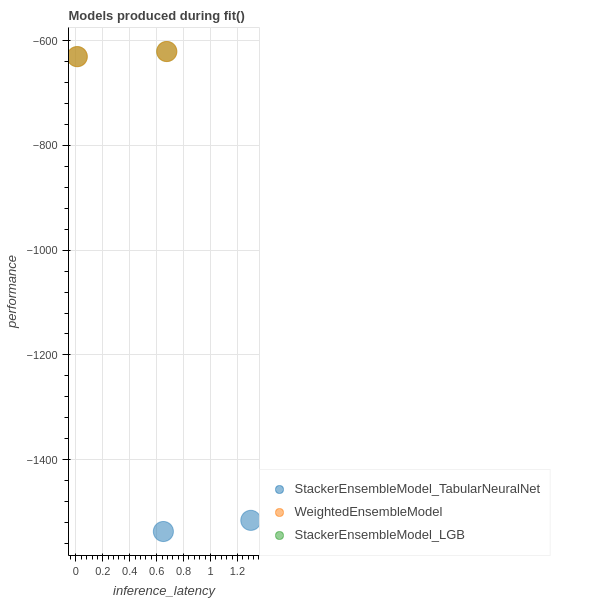

# Objective

 The objective of the problem is to predict the NFH values based on the given data set. Here the data set have columns 'Date(IST)', 'NFO', 'NFH', 'NFL', 'NFC', 'FIIB', 'FIIS', 'FIIN','DIIB', 'DIIS', 'DIIN', 'August', 'December', 'CAD', 'DAD', 'DOD''NDAD', 'Currey', 'Flow', 'Shine', 'Vega'. 

 # Data Cleaning

 First do the data cleaning process, dropped 2 columns index and date columns.

# Data Split

Split the train and Test data with ratio 70%-30%

# Model Training

Select the label class to predict.
Fit() and Predictions performed based on the autogluon models 

# do Hyperparametr tuning and ensemble techniques

 1.preprocesses raw data (identifies the type of each feature)

 2.identifies what type of prediction problem this is (binary/multi-class classification or regression) 

 3.splits data appropriately   (eg.training/validation sets, k-fold split)

 4.individually trains/tunes various models (RandomForest/ExtraTrees, KNN, 
 NeuralNet, GBDT)

 5.assembles ensemble that outperforms all the individual models

 6. Plot the HPO summary graph which will be get at summary report as html file.